In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)
airQuality = pd.read_csv("Daily-AQI-data.csv")

good_quality = airQuality[airQuality['description'] == 'Good']
neighborhood_counts = good_quality['site'].value_counts()
print("Amount of Good Days these neighborhood have")
print(neighborhood_counts)

Amount of Good Days these neighborhood have
site
Parkway East             9612
North Braddock           9458
Lawrenceville 2          7144
Harrison Township        6877
Liberty 2                5642
South Fayette            5417
Lawrenceville            4395
Avalon                   4324
Pittsburgh               4268
Flag Plaza               3999
Glassport High Street    3549
Liberty                  3403
Lincoln                  2754
Clairton                 1371
West Mifflin              301
Name: count, dtype: int64


In [3]:
avg_aqi = airQuality.groupby('site')['index_value'].mean().sort_values()
print("Average AQI by site (lower = better):")
print(avg_aqi)

Average AQI by site (lower = better):
site
Lawrenceville 2           3.020857
West Mifflin              6.335548
Flag Plaza                9.949275
Glassport High Street    17.316998
Liberty                  17.534651
North Braddock           19.172827
Parkway East             21.508634
Pittsburgh               24.698729
Harrison Township        25.011307
South Fayette            25.130882
Avalon                   25.301538
Clairton                 29.869884
Liberty 2                31.921758
Lincoln                  35.108002
Lawrenceville            37.351261
Name: index_value, dtype: float64


In [5]:
best_site_data = airQuality[airQuality['site'] == 'Lawrenceville 2'].copy()
best_site_data['date'] = pd.to_datetime(best_site_data['date'])
monthly_avg = best_site_data.groupby(best_site_data['date'].dt.to_period('M'))['index_value'].mean()
print("Monthly trends for Lawrenceville 2:")
print(monthly_avg)

Monthly trends for Lawrenceville 2:
date
2016-01    5.080645
2016-02    3.526316
2016-03    3.435484
2016-04    3.033333
2016-05    3.109091
2016-06    3.379310
2016-07    3.566667
2016-08    3.145161
2016-09    3.466667
2016-10    2.870968
2016-11    5.220339
2016-12    3.612903
2017-01    2.774194
2017-02    3.418182
2017-03    2.419355
2017-04    2.372881
2017-05    2.629032
2017-06    2.533333
2017-07    2.806452
2017-08    3.354839
2017-09    3.416667
2017-10    3.322581
2017-11    4.033333
2017-12    3.516129
2018-01    3.983871
2018-02    3.339286
2018-03    3.129032
2018-04    3.135593
2018-05    3.790323
2018-06    2.666667
2018-07    3.480000
2018-08    2.854545
2018-09    2.183333
2018-10    2.467742
2018-11    2.600000
2018-12    3.500000
2019-01    4.064516
2019-02    4.535714
2019-03    3.606557
2019-04    2.683333
2019-05    2.145161
2019-06    2.116667
2019-07    2.177419
2019-08    2.467742
2019-09    3.050000
2019-10    3.225806
2019-11    3.316667
2019-12    3.983871

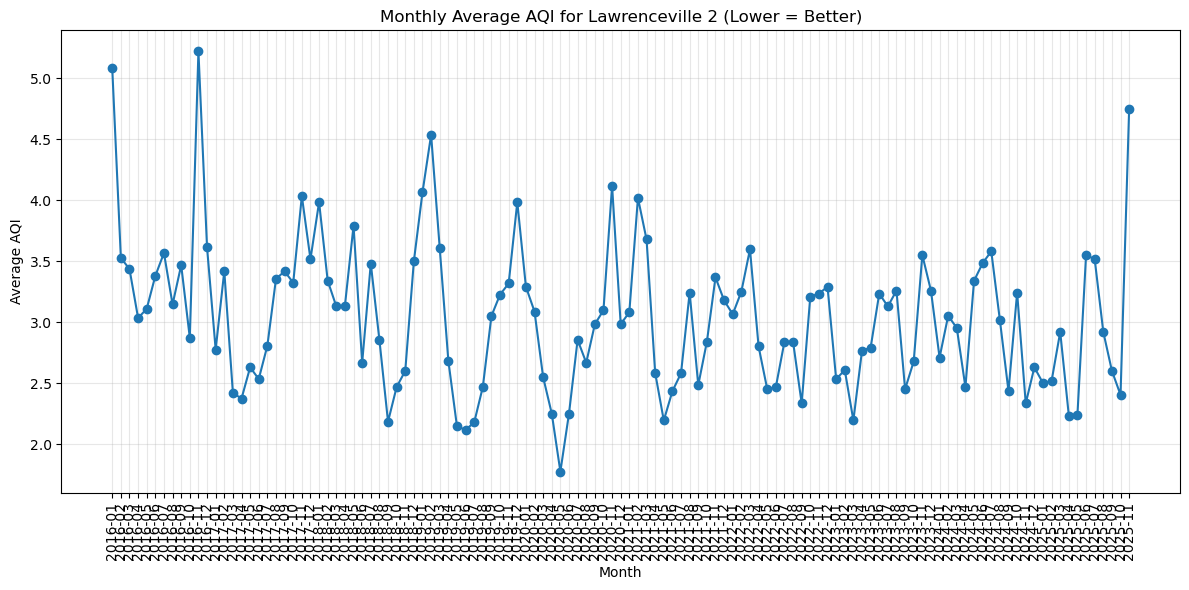

In [21]:
plt.figure(figsize=(12, 6))
monthly_avg_values = [float(x) for x in monthly_avg.values]
plt.plot(range(len(monthly_avg)), monthly_avg_values, marker='o')
plt.title('Monthly Average AQI for Lawrenceville 2 (Lower = Better)')
plt.xlabel('Month')
plt.ylabel('Average AQI')
plt.xticks(range(len(monthly_avg)), [str(x) for x in monthly_avg.index], rotation=90, fontsize = 10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()